## 0.0 read data

In [128]:
import numpy as np
from numpy import linalg
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

In [148]:
df = pd.read_csv('./data/train.csv')
label = pd.read_csv('./data/train_label.csv')

In [149]:
df = df.drop(columns=['reservation_status'])

In [150]:
# convert month name to values
m = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df.arrival_date_month = df.arrival_date_month.map(m)

In [151]:
# convert hotel type to binary
h = {'City Hotel':0, 'Resort Hotel':1}
df.hotel = df.hotel.map(h)

In [152]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [153]:
# # column_trans = make_column_transformer(
#     (OneHotEncoder(), ['deposit_type', 'customer_type', 'reservation_status']),
#     remainder='passthrough')

In [154]:
# df_trans = column_trans.fit_transform(df)

In [155]:
# df_trans.shape

In [156]:
df

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,0,1,0,342,2015,7,27,1,0,0,...,3,No Deposit,NaN,NaN,0,Transient,-6.305161,0,0,2015-07-01
1,1,0,0,257,2015,7,27,1,0,2,...,1,No Deposit,6.0,NaN,0,Transient,75.052227,0,0,2015-07-03
2,2,0,0,257,2015,7,27,1,0,2,...,0,No Deposit,6.0,NaN,0,Transient,74.546401,0,0,2015-07-03
3,3,0,0,257,2015,7,27,1,0,2,...,0,No Deposit,6.0,NaN,0,Transient,76.376288,0,0,2015-07-03
4,4,0,0,257,2015,7,27,1,0,2,...,0,No Deposit,6.0,NaN,0,Transient,49.411647,0,0,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91526,91526,1,1,19,2017,3,13,31,0,2,...,0,No Deposit,250.0,NaN,0,Transient,79.223571,0,1,2017-03-22
91527,91527,1,0,28,2017,3,13,31,0,2,...,0,No Deposit,NaN,NaN,0,Transient,-6.822102,0,0,2017-04-02
91528,91528,1,0,2,2017,3,13,31,0,1,...,1,No Deposit,NaN,NaN,0,Transient,90.814554,0,2,2017-04-01
91529,91529,1,0,30,2017,3,13,31,3,7,...,0,No Deposit,250.0,NaN,0,Transient,38.135565,0,1,2017-04-10


In [157]:
df.isna().sum()

ID                                    0
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             468
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13217


"children" has few NAs, while "country", "agent", and "company" have a lot of NA values. So we will discard "country", "agent", "company" attributes, and fill in median in NA of "children".

In [158]:
df = df.drop(columns = ['country', 'agent', 'company'])

In [162]:
df.fillna(df.children.median())

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,0,1,0,342,2015,7,27,1,0,0,...,C,C,3,No Deposit,0,Transient,-6.305161,0,0,2015-07-01
1,1,0,0,257,2015,7,27,1,0,2,...,A,A,1,No Deposit,0,Transient,75.052227,0,0,2015-07-03
2,2,0,0,257,2015,7,27,1,0,2,...,A,A,0,No Deposit,0,Transient,74.546401,0,0,2015-07-03
3,3,0,0,257,2015,7,27,1,0,2,...,A,A,0,No Deposit,0,Transient,76.376288,0,0,2015-07-03
4,4,0,0,257,2015,7,27,1,0,2,...,A,A,0,No Deposit,0,Transient,49.411647,0,0,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91526,91526,1,1,19,2017,3,13,31,0,2,...,C,C,0,No Deposit,0,Transient,79.223571,0,1,2017-03-22
91527,91527,1,0,28,2017,3,13,31,0,2,...,A,A,0,No Deposit,0,Transient,-6.822102,0,0,2017-04-02
91528,91528,1,0,2,2017,3,13,31,0,1,...,E,F,1,No Deposit,0,Transient,90.814554,0,2,2017-04-01
91529,91529,1,0,30,2017,3,13,31,3,7,...,A,A,0,No Deposit,0,Transient,38.135565,0,1,2017-04-10


In [163]:
df.columns

Index(['ID', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date'],
      dtype='object')

In [168]:
# Creating dummy variables:
df_dum = pd.get_dummies(df, columns=['meal', 'market_segment', 'distribution_channel', \
                                 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'])
df_dum.columns

Index(['ID', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date', 'meal_BB',
       'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 

In [16]:
# # convert reservation status date to int
# df['res_year'] = [int((df.reservation_status_date.str.split('-'))[i][0]) for i in range(len(df))]
# df['res_month'] = [int((df.reservation_status_date.str.split('-'))[i][1]) for i in range(len(df))]
# df['res_date'] = [int((df.reservation_status_date.str.split('-'))[i][2]) for i in range(len(df))]


In [169]:
# drop the last column of each dummy category
df_dum = df_dum.drop(columns = ['reservation_status_date', 'meal_Undefined', 'market_segment_Undefined', 'market_segment_Undefined', 'distribution_channel_Undefined', 'assigned_room_type_P', 'deposit_type_Refundable', 'customer_type_Transient-Party'])

In [170]:
df_dum

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,customer_type_Contract,customer_type_Group,customer_type_Transient
0,0,1,0,342,2015,7,27,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,0,257,2015,7,27,1,0,2,...,0,0,0,0,0,1,0,0,0,1
2,2,0,0,257,2015,7,27,1,0,2,...,0,0,0,0,0,1,0,0,0,1
3,3,0,0,257,2015,7,27,1,0,2,...,0,0,0,0,0,1,0,0,0,1
4,4,0,0,257,2015,7,27,1,0,2,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91526,91526,1,1,19,2017,3,13,31,0,2,...,0,0,0,0,0,1,0,0,0,1
91527,91527,1,0,28,2017,3,13,31,0,2,...,0,0,0,0,0,1,0,0,0,1
91528,91528,1,0,2,2017,3,13,31,0,1,...,0,0,0,0,0,1,0,0,0,1
91529,91529,1,0,30,2017,3,13,31,3,7,...,0,0,0,0,0,1,0,0,0,1


## Basic analysis

#### Target: "is_canceled"

Steps:

1. Predict "is_canceled" by attributes in each tuple

2. Multiply predictions by "ADR"

3. Group by date

4. Predict classification of the daily revenue to the labels on $y$.


In [171]:
df_dum.describe()

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,customer_type_Contract,customer_type_Group,customer_type_Transient
count,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,...,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000
mean,45765.000000,0.342299,0.357912,96.286843,2015.899837,6.747648,28.183621,15.814063,0.899291,2.448438,...,0.020102,0.005714,0.003256,0.002546,0.000011,0.869957,0.128568,0.037834,0.004873,0.723646
std,26422.868082,0.474482,0.479389,105.454726,0.608632,3.421807,15.012139,8.758629,1.004555,1.935080,...,0.140352,0.075375,0.056966,0.050390,0.003305,0.336353,0.334724,0.190796,0.069635,0.447197
min,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22882.500000,0.000000,0.000000,15.000000,2016.000000,3.000000,13.000000,8.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,45765.000000,0.000000,0.000000,58.000000,2016.000000,7.000000,31.000000,16.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,68647.500000,1.000000,1.000000,145.000000,2016.000000,10.000000,41.000000,23.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,91530.000000,1.000000,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Building X and y

In [172]:
X_train = df_dum.drop(columns = ['ID', 'is_canceled'], axis = 'columns')

In [173]:
X_train

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,customer_type_Contract,customer_type_Group,customer_type_Transient
0,1,342,2015,7,27,1,0,0,2,0.0,...,0,0,0,0,0,1,0,0,0,1
1,0,257,2015,7,27,1,0,2,1,0.0,...,0,0,0,0,0,1,0,0,0,1
2,0,257,2015,7,27,1,0,2,2,0.0,...,0,0,0,0,0,1,0,0,0,1
3,0,257,2015,7,27,1,0,2,2,0.0,...,0,0,0,0,0,1,0,0,0,1
4,0,257,2015,7,27,1,0,2,2,0.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91526,1,19,2017,3,13,31,0,2,2,2.0,...,0,0,0,0,0,1,0,0,0,1
91527,1,28,2017,3,13,31,0,2,2,0.0,...,0,0,0,0,0,1,0,0,0,1
91528,1,2,2017,3,13,31,0,1,2,0.0,...,0,0,0,0,0,1,0,0,0,1
91529,1,30,2017,3,13,31,3,7,2,0.0,...,0,0,0,0,0,1,0,0,0,1


In [174]:
X_train = X_train.to_numpy()

In [175]:
X_train

array([[1.000e+00, 3.420e+02, 2.015e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 2.570e+02, 2.015e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 2.570e+02, 2.015e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 2.000e+00, 2.017e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 3.000e+01, 2.017e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 1.000e+00, 2.017e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [176]:
y_train = df.is_canceled

In [177]:
y_train.value_counts(normalize=True)

0    0.642088
1    0.357912
Name: is_canceled, dtype: float64

The cancel rate is around 35%.

## KNN

In [178]:
from sklearn.feature_selection import SelectKBest, chi2 # chi2 only takes non-negative, drop adr for now
X_train1 = X_train.drop(columns = ['adr'])
X_6_best= SelectKBest(chi2, k=6).fit(X_train1, y_train)
mask = X_5_best.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, X_train1.columns):
    if bool:
        new_feat.append(feature)
print('The best features are:{}'.format(new_feat)) # The list of your 10 best features

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [55]:
X_train = df_dum[['lead_time', 'previous_cancellations', 'days_in_waiting_list', \
              'deposit_type_Non Refund', 'reservation_status_Canceled', 'reservation_status_Check-Out']]

In [22]:
X_train

,lead_time,previous_cancellations,days_in_waiting_list,deposit_type_Non Refund,reservation_status_Canceled,reservation_status_Check-Out
0,342,0,0,0,0,1
1,257,0,0,0,0,1
2,257,0,0,0,0,1
3,257,0,0,0,0,1
4,257,0,0,0,0,1
...,...,...,...,...,...,...
91526,19,0,0,0,1,0
91527,28,0,0,0,0,1
91528,2,0,0,0,0,1
91529,30,0,0,0,0,1


#### Training with selected best 6 features using kNN (k=5)

In [23]:
X_train = X_train.to_numpy()

In [70]:
# from sklearn.neighbors import NearestNeighbors as kNN
# knn = KNeighborsClassifier(n_neighbors=10)
# pred = knn.predict(X_test)
# from sklearn.metrics import accuracy_score
# # accuracy_score(pred,y_test)

In [24]:
from sklearn.model_selection import cross_val_score

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')

In [30]:
print(scores)

[0.99801557 0.94527363 0.95484273 0.97366791 0.95815116 0.97785245
 0.97094068 0.95546318 0.98014888 0.99419847]


In [31]:
print(scores.mean())

0.9708554665559914


In [124]:
# k_range = range(1, 20)
# k_scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1') # usually more indicative
#     k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-validated F1')

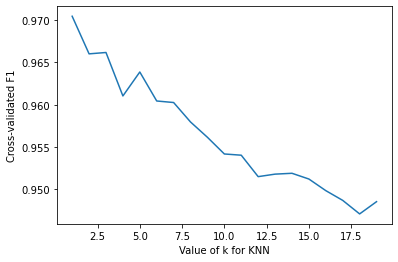

In [128]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# # plot the value of k of kNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(k_range, k_scores)
# plt.xlabel('Value of k for KNN')
# plt.ylabel('Cross-validated F1')

Using 6 features selected by $\chi^2$ with kNN ($k = 5$), we get an average accuracy of 0.97.

#### Perform polynomial (quadratic without interaction) transform on the 6 features

In [124]:
X_train_2 = X_train.copy()

In [125]:
# X_train_2['lead_time_2'] = X_train_2['lead_time'] ** 2
X_train_2['previous_cancellations_2'] = X_train_2['previous_cancellations'] ** 2
# X_train_2['days_in_waiting_list_2'] = X_train_2['days_in_waiting_list'] ** 2

In [107]:
X_train_2

,lead_time,previous_cancellations,days_in_waiting_list,deposit_type_Non Refund,reservation_status_Canceled,reservation_status_Check-Out,lead_time_2,previous_cancellations_2,days_in_waiting_list_2
0,342,0,0,0,0,1,116964,0,0
1,257,0,0,0,0,1,66049,0,0
2,257,0,0,0,0,1,66049,0,0
3,257,0,0,0,0,1,66049,0,0
4,257,0,0,0,0,1,66049,0,0
...,...,...,...,...,...,...,...,...,...
91526,19,0,0,0,1,0,361,0,0
91527,28,0,0,0,0,1,784,0,0
91528,2,0,0,0,0,1,4,0,0
91529,30,0,0,0,0,1,900,0,0


In [109]:
X_6_best= SelectKBest(chi2, k=6).fit(X_train_2, y_train)
mask = X_5_best.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, X_train_2.columns):
    if bool:
        new_feat.append(feature)
print('The best features are:{}'.format(new_feat)) # The list of your 10 best features

The best features are:['lead_time', 'days_in_waiting_list', 'reservation_status_Canceled', 'lead_time_2', 'previous_cancellations_2', 'days_in_waiting_list_2']


In [110]:
X_train_2 = X_train_2[['lead_time','lead_time_2', 'previous_cancellations_2', 'days_in_waiting_list', \
              'days_in_waiting_list_2', 'reservation_status_Canceled']]

In [111]:
X_train_2

,lead_time,lead_time_2,previous_cancellations_2,days_in_waiting_list,days_in_waiting_list_2,reservation_status_Canceled
0,342,116964,0,0,0,0
1,257,66049,0,0,0,0
2,257,66049,0,0,0,0
3,257,66049,0,0,0,0
4,257,66049,0,0,0,0
...,...,...,...,...,...,...
91526,19,361,0,0,0,1
91527,28,784,0,0,0,0
91528,2,4,0,0,0,0
91529,30,900,0,0,0,0


In [126]:
X_train_2 = X_train_2.to_numpy()

In [127]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train_2, y_train, cv=10, scoring='accuracy')

In [128]:
print(scores)

[0.99836137 0.956954   0.96809789 0.98164536 0.96995521 0.99027641
 0.97782148 0.96678685 0.98503223 0.99158746]


In [129]:
print(scores.mean())

0.9786518260529655


After second-order transform, the accuracy score becomes lower.

prev: accuracy = 0.978 <br>
prev + days: accuracy = 0.9763356563072726

## Logistic Regression

### 使用 L2 regularization, 搭配上'lbfgs','newton-cg','sag'三種演算法

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0, penalty='l2', solver='newton-cg', multi_class='multinomial').fit(x, y)

y_result = clf.predict(x)
y_proba = clf.predict_proba(x) 

# print(y_proba)
accuracy_score(y, y_result)
print("Number of mislabeled points out of a total %d points : %d"% (x.shape[0],(y != y_result).sum()))

Number of mislabeled points out of a total 640 points : 376


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


### lbfgs

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0, penalty='l2', solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

y_result = clf.predict(X_train)
y_proba = clf.predict_proba(X_train) 

print(y_proba)
accuracy_score(y_train, y_result)
print("Number of mislabeled points out of a total %d points : %d"% (X_train.shape[0],(y_train != y_result).sum()))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### newton-cg

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0, penalty='l2', solver='newton-cg', multi_class='multinomial').fit(X_train, y_train)

y_result = clf.predict(X_train)
y_proba = clf.predict_proba(X_train) 

print(y_proba)
accuracy_score(y_train, y_result)
print("Number of mislabeled points out of a total %d points : %d"% (X_train.shape[0],(y_train != y_result).sum()))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### sag

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0, penalty='l2', solver='sag', multi_class='multinomial').fit(X_train, y_train)

y_result = clf.predict(X_train)
y_proba = clf.predict_proba(X_train) 

print(y_proba)
accuracy_score(y_train, y_result)
print("Number of mislabeled points out of a total %d points : %d"% (X_train.shape[0],(y_train != y_result).sum()))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Calculate predicted daily revenue

In [179]:
def calculateDateRevenue(df):
    df1 = df[["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month", "adr", "is_canceled"]]
    df2["can_adr"] = df1["is_canceled"] * df1["adr"] 
    df3 = df2[["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month", "can_adr"]]
    df4 = df3.groupby(by=["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"]).sum()
    x = df4.to_numpy()
    return(x) # one column: revenue

### Desicion Stump (revenue to label by Training Data)

In [180]:
x_train = calculateDateRevenue(df)

In [181]:
y_train = label["label"].to_numpy()

In [182]:
from sklearn import tree

# classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

### Computing accuracy 

In [183]:
def computeAccuracy(x, y): #x: test revenue, y: test label
    y_result = clf.predict(x)
    y_proba = clf.predict_proba(x) 

    # print(y_proba)
    accuracy_score(y, y_result)
    print("Number of mislabeled points out of a total %d points : %d"% (x.shape[0],(y != y_result).sum()))

In [184]:
computeAccuracy(x_train, y_train)

Number of mislabeled points out of a total 640 points : 0
